In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
plt.style.available
plt.style.use('ggplot')

In [3]:
plt.rcParams['figure.figsize'] = (15,6)

In [4]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [173]:
df.isnull().sum()[df.isnull().sum()  > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

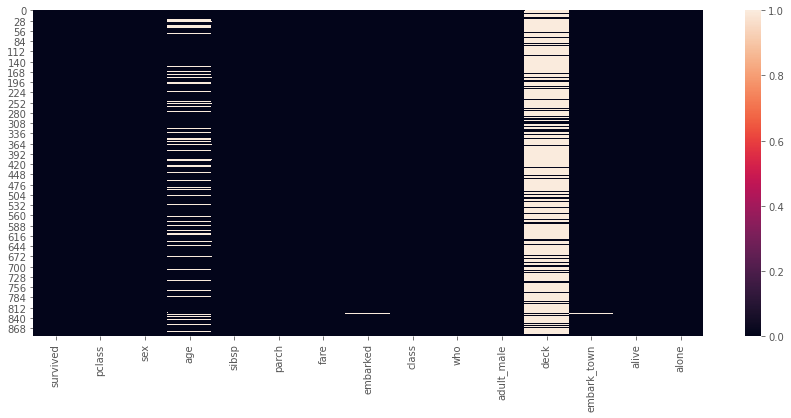

In [ ]:
sns.heatmap(df.isnull())

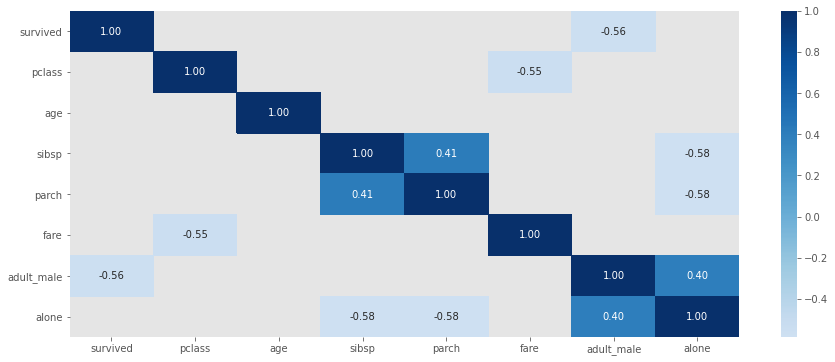

In [ ]:
corr = df.corr()

kot = corr[corr.apply(lambda x: abs(x)>=.4)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Blues', center = 0);

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

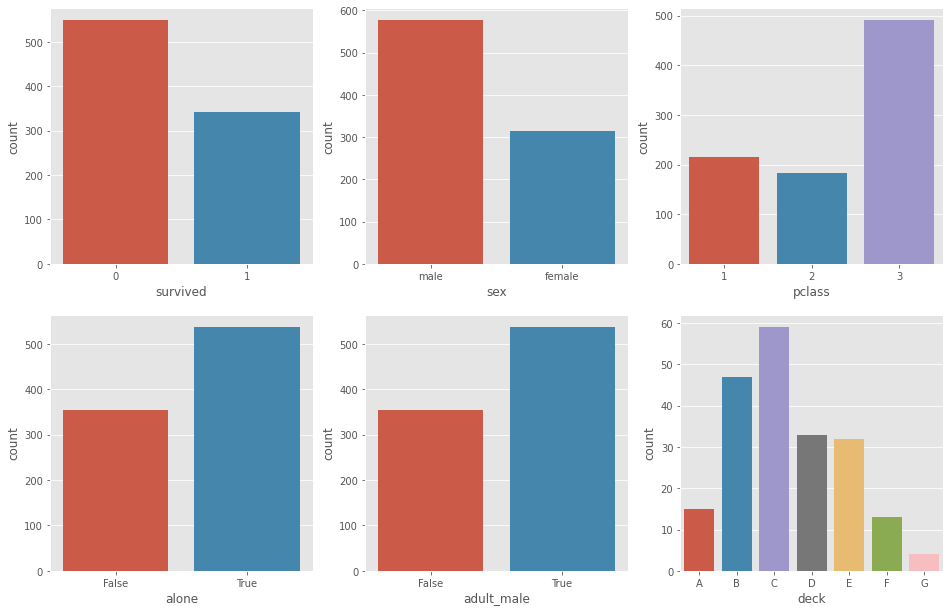

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
sns.countplot(data = df, x = 'survived',)

plt.subplot(3,3,2)
sns.countplot(data = df, x = 'sex',)

plt.subplot(3,3,3)
sns.countplot(data = df, x = 'pclass',)

plt.subplot(3,3,4)
sns.countplot(data = df, x = 'alone',)

plt.subplot(3,3,5)
sns.countplot(data = df, x = 'adult_male',)

plt.subplot(3,3,6)
sns.countplot(data = df, x = 'deck',)

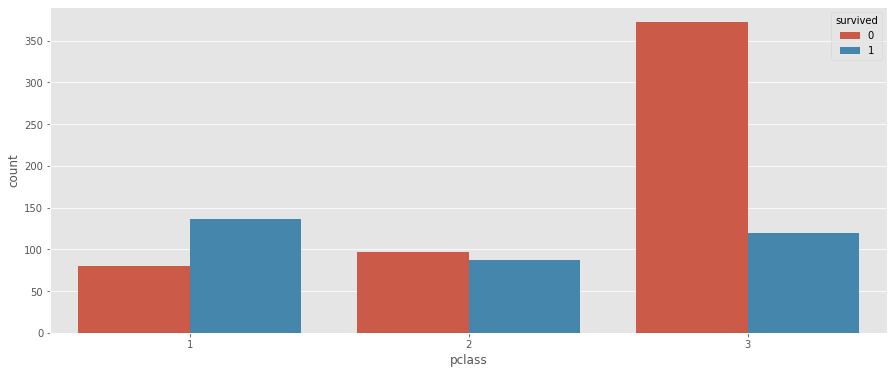

In [5]:
sns.countplot(data=df, x='pclass', hue='survived')

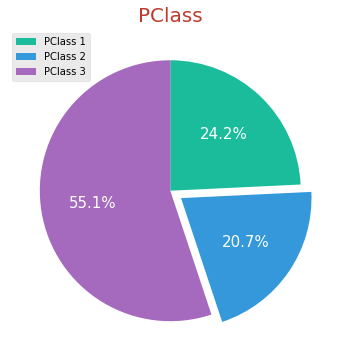

In [51]:
sorted_counts = df['pclass'].value_counts().sort_index()
explode = (0,0.1,0) # explode any one of them
label = ['PClass 1','PClass 2', 'PClass 3']
patches, texts, autotexts = plt.pie(sorted_counts, startangle = 90,autopct='%1.1f%%',
        counterclock = False, explode=explode, colors=['#1ABC9C', '#3498DB', '#A569BD']);
plt.setp(autotexts, size=15, color='white')
plt.legend(loc='upper left', labels= label)
plt.title('PClass', size=20, color='#C0392B')
plt.show()

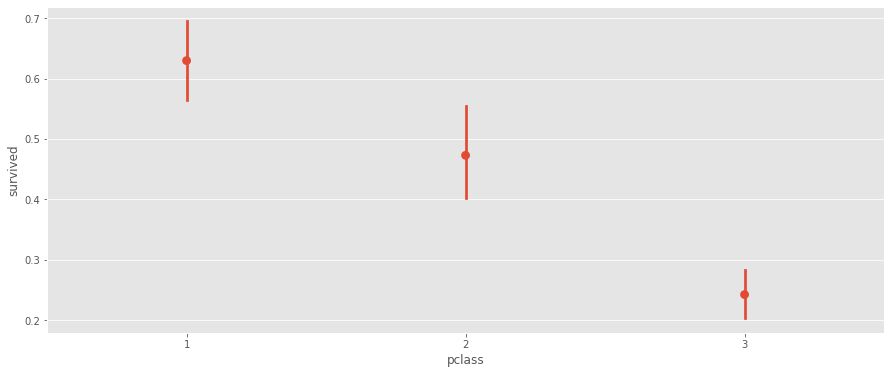

In [74]:
sns.pointplot(data = df, y= 'survived', x = 'pclass', ci=95,linestyles = "")

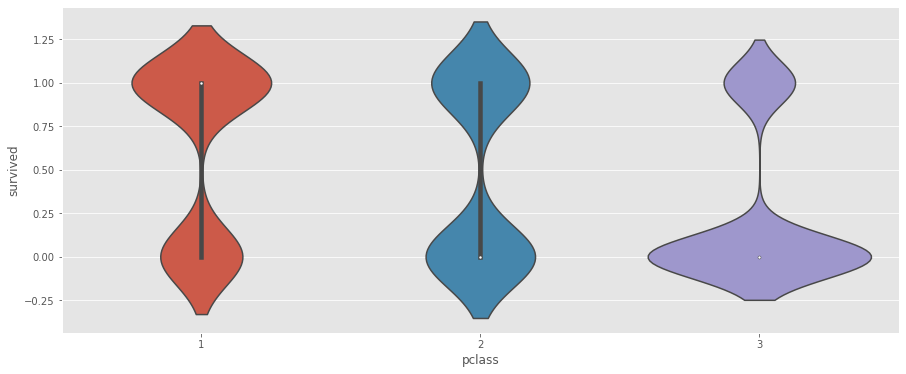

In [76]:
sns.violinplot(data = df, x = 'pclass', y= 'survived', ci=95,)

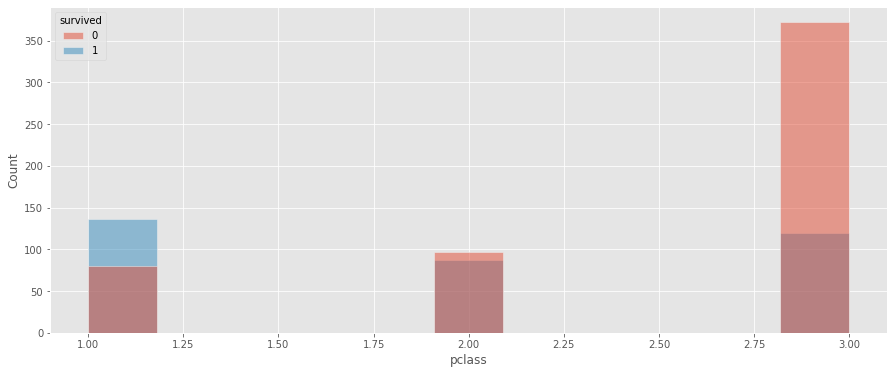

In [80]:
sns.histplot(data=df, x='pclass', hue='survived')

## Sex

In [ ]:
pd.crosstab(df['survived'], df['sex'], margins=True)

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


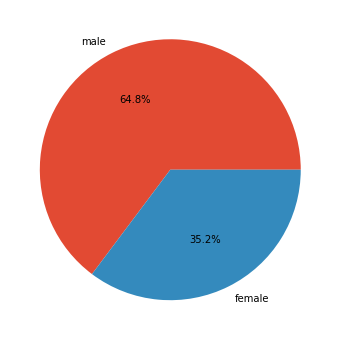

In [125]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct='%1.1f%%',)
plt.show()

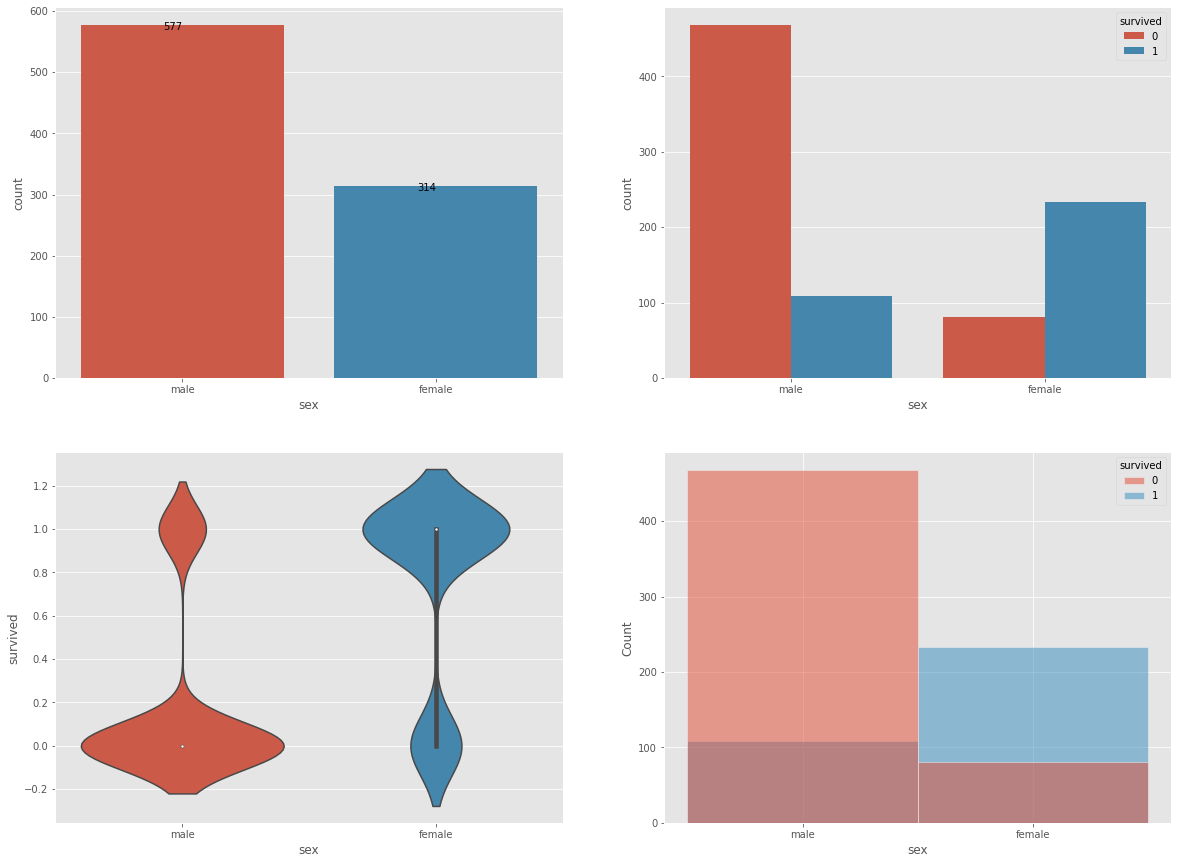

In [129]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2,1)
sns.countplot(data=df, x='sex')

cat_counts = df['sex'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, count, ha = 'right', color = 'k')


plt.subplot(2, 2,2)
sns.countplot(data=df, x='sex', hue='survived')

plt.subplot(2, 2,3)
sns.violinplot(data=df, x='sex', y='survived')

plt.subplot(2, 2,4)
sns.histplot(data=df, x='sex', hue='survived')

plt.show()

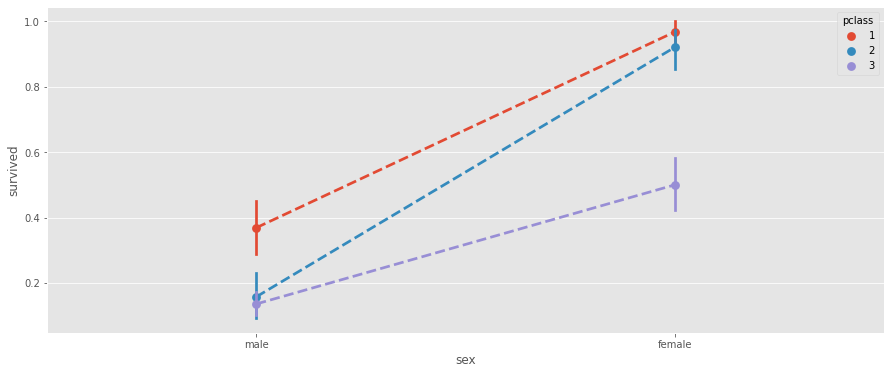

In [153]:
sns.pointplot(data=df, x='sex', y='survived', hue='pclass', linestyles='--')

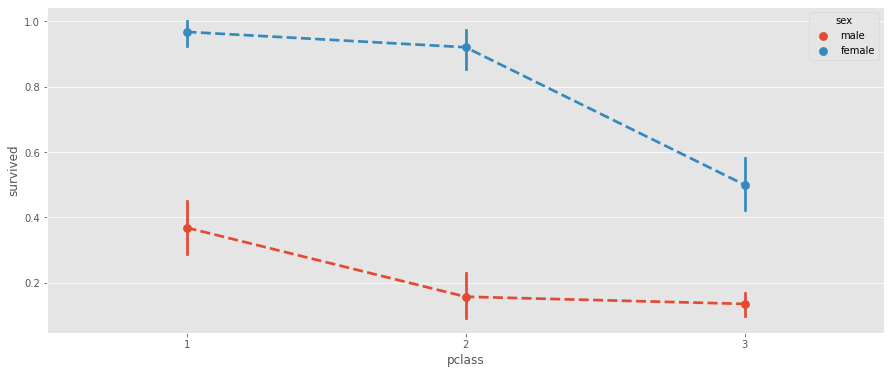

In [154]:
sns.pointplot(data=df, x='pclass', y='survived', hue='sex', linestyles='--')

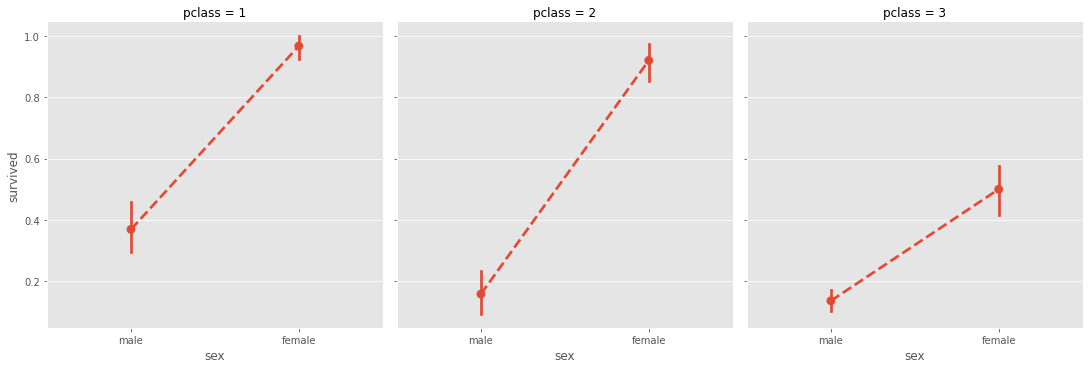

In [151]:
sns.catplot(data=df, x='sex', y='survived', col='pclass', 
            kind='point',linestyles='--')

## Age

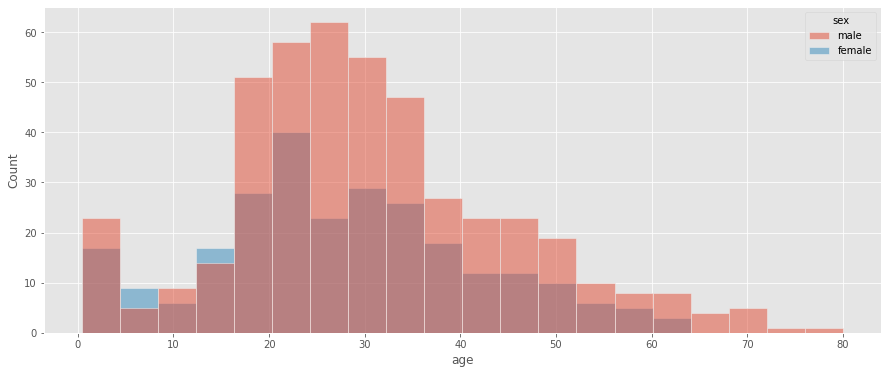

In [278]:
sns.histplot(data=df, x='age', hue='sex');

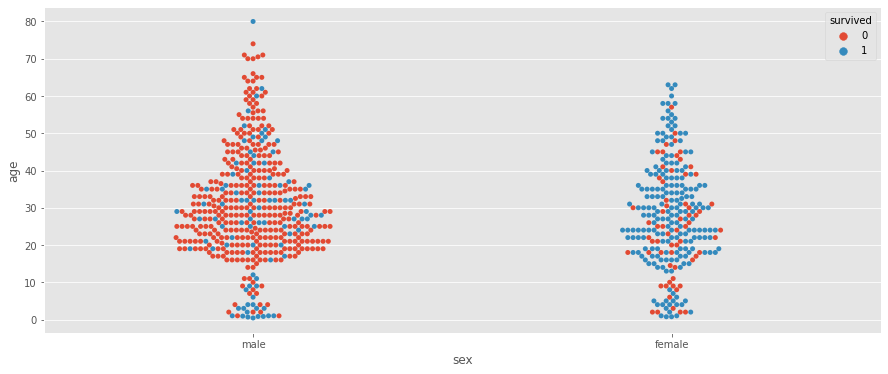

In [281]:
sns.swarmplot(data=df, x='sex', y='age', hue='survived')

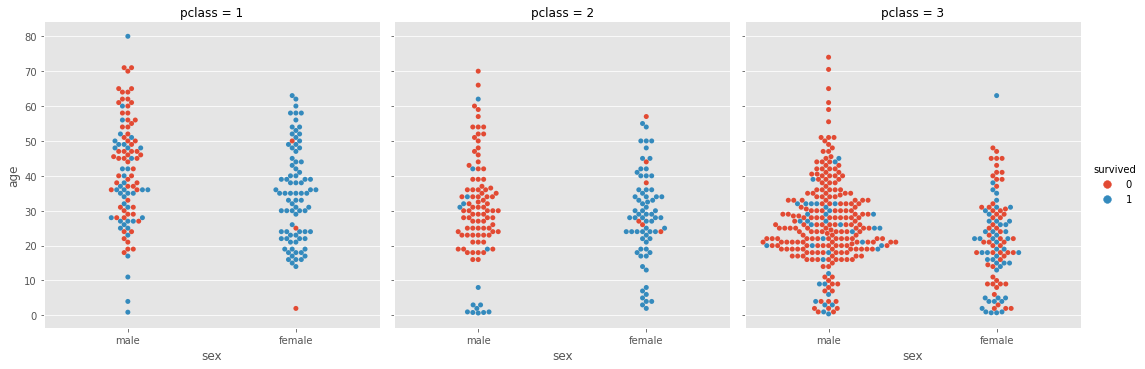

In [293]:
sns.catplot(data=df, x='sex', y='age', hue='survived', kind='swarm', col='pclass')

In [207]:
df['age'].value_counts().sort_values(ascending=False), df['age'].min(), df['age'].max()

(24.00    30
 22.00    27
 18.00    26
 19.00    25
 30.00    25
          ..
 14.50     1
 0.67      1
 24.50     1
 20.50     1
 0.42      1
 Name: age, Length: 88, dtype: int64, 0.42, 80.0)

- Age stage
    - Infant = 0-1 year.
    - Toddler = 2-4 yrs.
    - Child = 5-12 yrs.
    - Teen = 13-19 yrs.
    - Adult = 20-39 yrs.
    - Middle Age Adult = 40-59 yrs.
    -  Senior Adult = 60+

In [6]:
bin_edges = [0,1,4, 12, 19, 39, 59, 100]
bin_names = ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult']
df['age_bin'] = pd.cut(df['age'], bin_edges, labels=bin_names, right=True)
df['age_bin'].value_counts(), df['age_bin'].count()

(Adult               387
 Middle Age Adult    137
 Teen                 95
 Child                29
 Senior Adult         26
 Toddler              26
 Infant               14
 Name: age_bin, dtype: int64, 714)

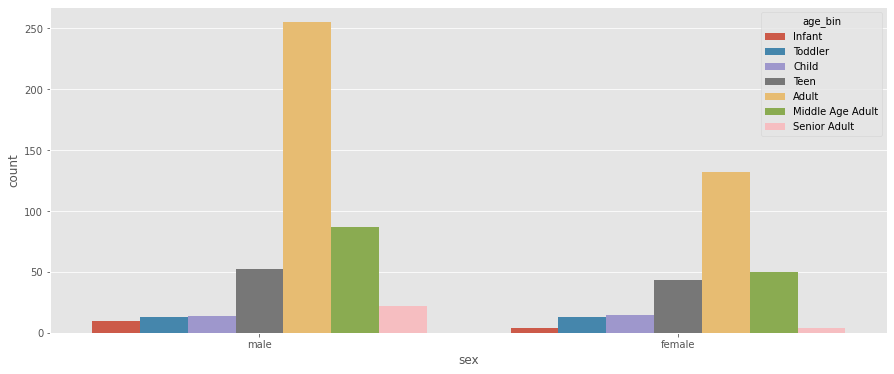

In [7]:
sns.countplot(data=df, x='sex', hue='age_bin')

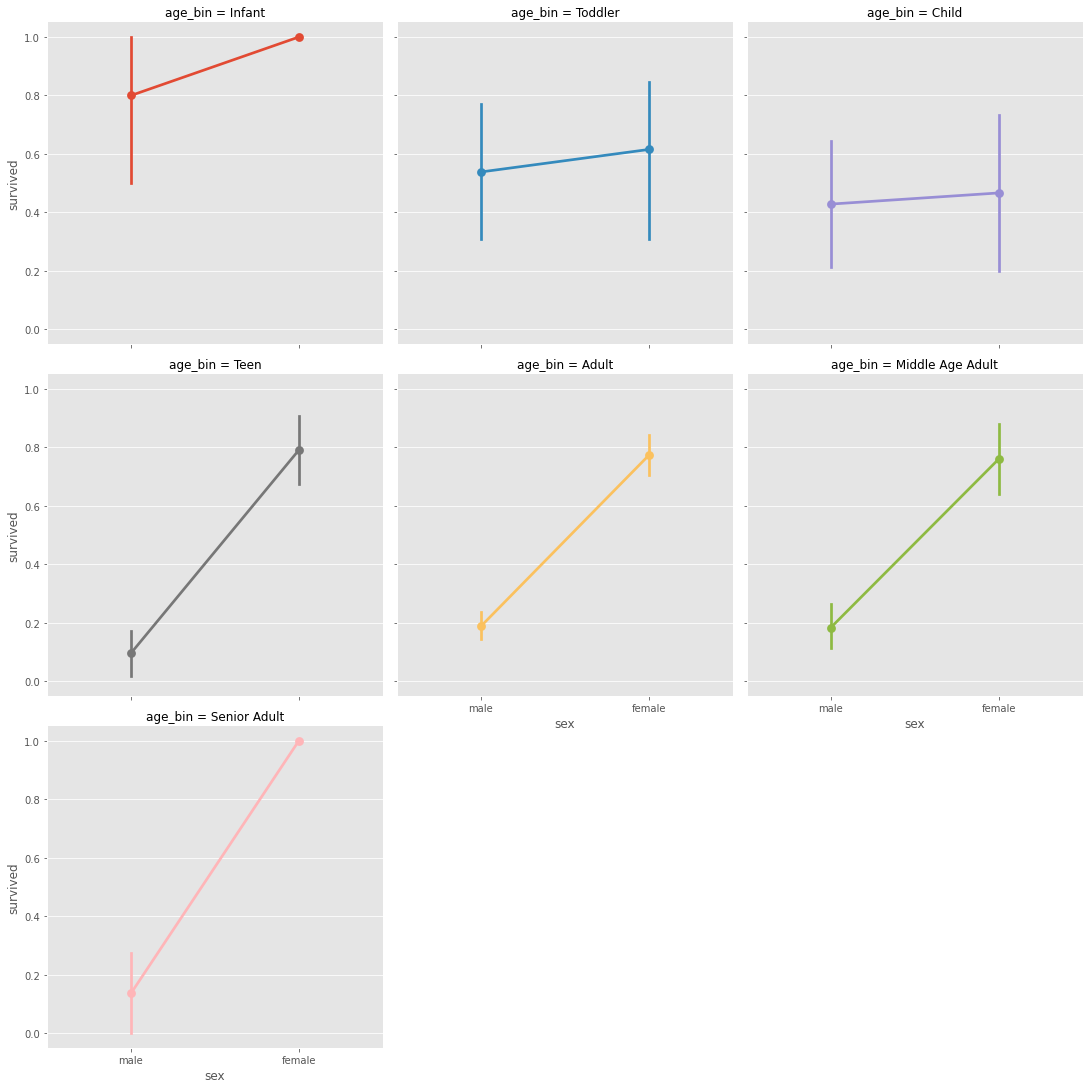

In [206]:
sns.catplot(data=df, x='sex', y='survived', hue='age_bin', kind='point', col='age_bin', col_wrap=3)

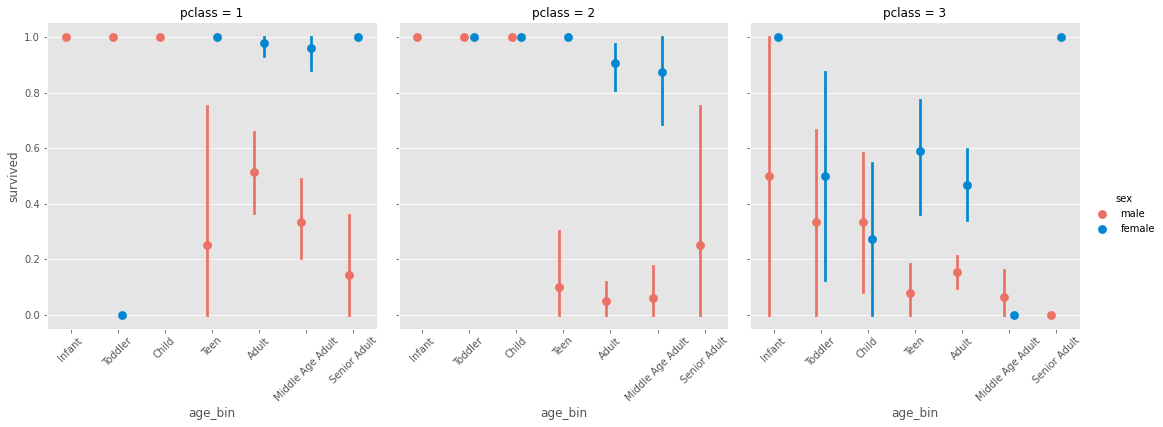

In [8]:
palette = sns.color_palette('Set2')
ax = sns.catplot(data=df, x='age_bin', y='survived', hue='sex', kind='point', col='pclass', linestyles='', 
                 palette=['#EC7063', '#0288D1'], dodge=0.2)
ax.set_xticklabels(rotation=45)

In [215]:
ct_counts = df.groupby(['sex', 'age_bin']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts= ct_counts.pivot(index = 'age_bin', columns = 'sex', values = 'count')
ct_counts

sex,female,male
age_bin,,
Infant,4,10
Toddler,13,13
Child,15,14
Teen,43,52
Adult,132,255
Middle Age Adult,50,87
Senior Adult,4,22


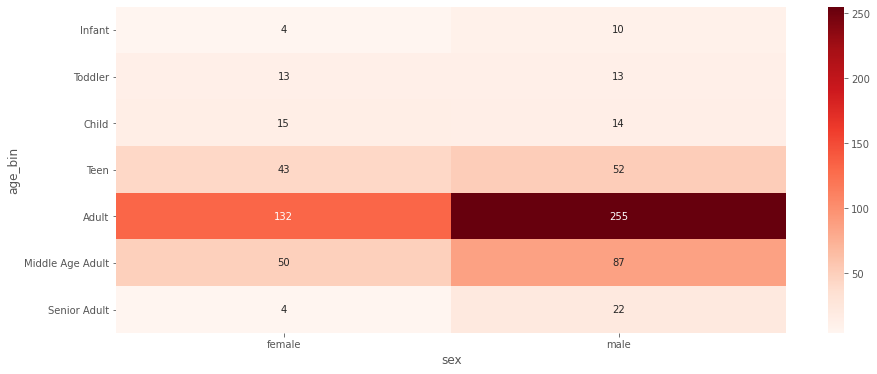

In [266]:
sns.heatmap(ct_counts, annot = True, fmt = 'd', cbar=True, cmap='Reds')

## Fare

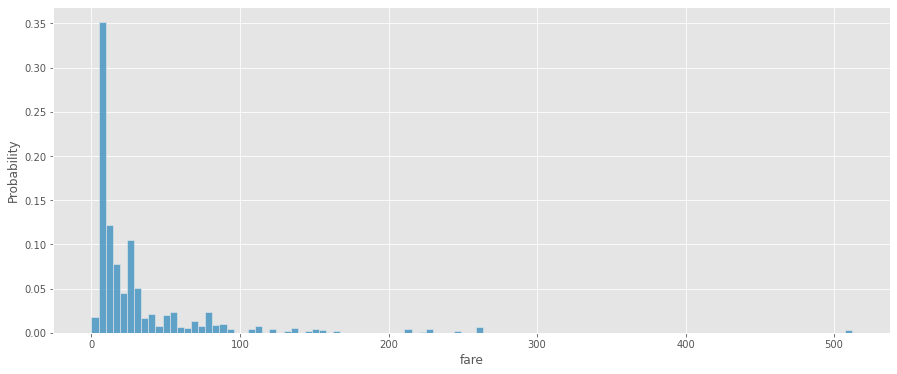

In [54]:
# xticks= np.arange(df['fare'].min(), df['fare'].max(), 10)

sns.histplot(df['fare'],stat='probability')
# plt.xticks(xticks, rotation=45)
plt.show()
# np.histogram_bin_edges(df['fare']).shape

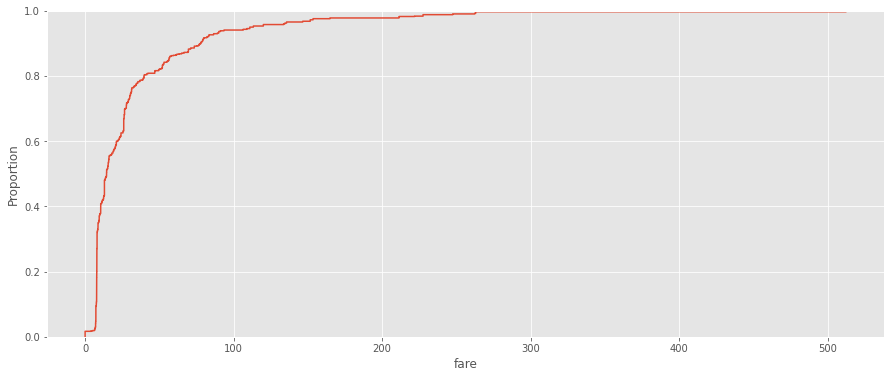

In [52]:
sns.ecdfplot(df['fare']);

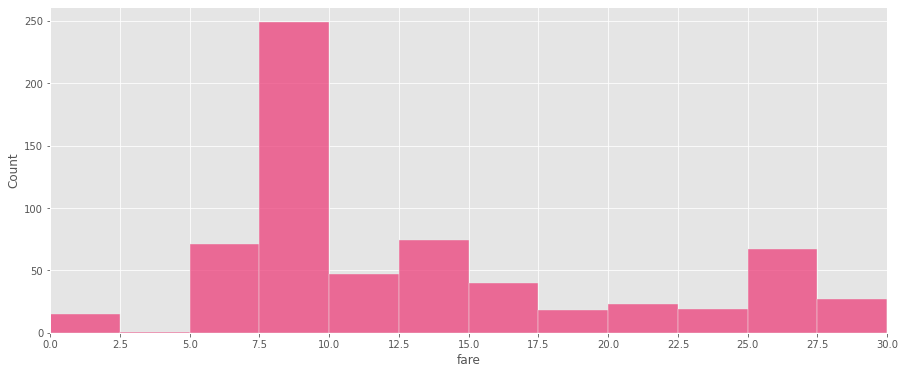

In [31]:
xticks= np.arange(df['fare'].min(), df['fare'].max(), 2.5)
sns.histplot(df['fare'], bins=xticks, color='#EC407A')
plt.xticks(xticks)
plt.xlim(0, 30)
plt.show()

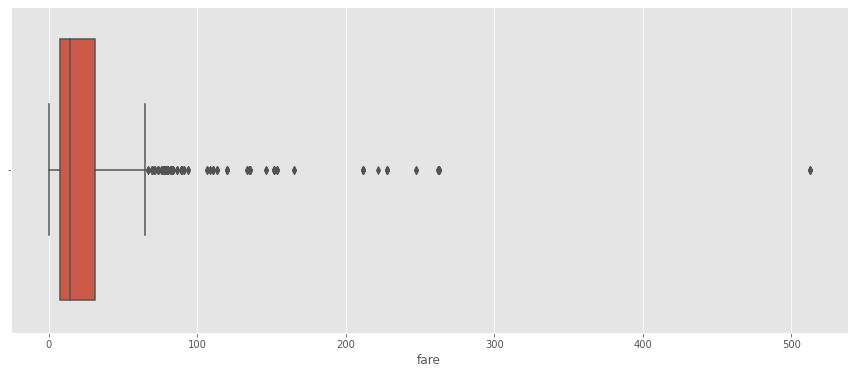

In [56]:
sns.boxplot(data=df, x='fare')

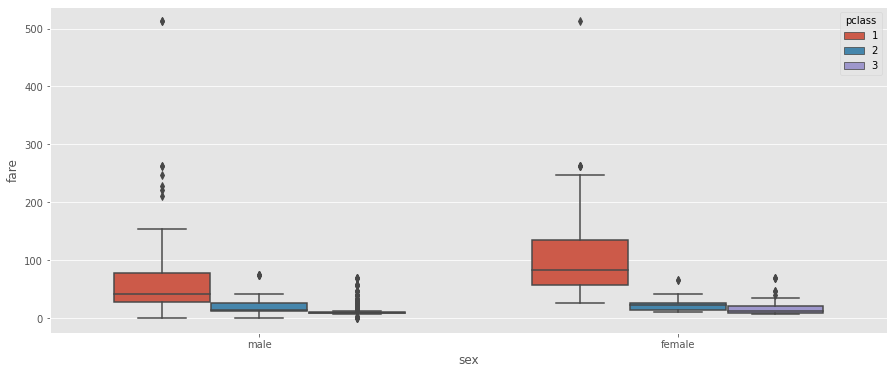

In [62]:
sns.boxplot(data=df, x='sex', y='fare', hue='pclass', width=0.7)

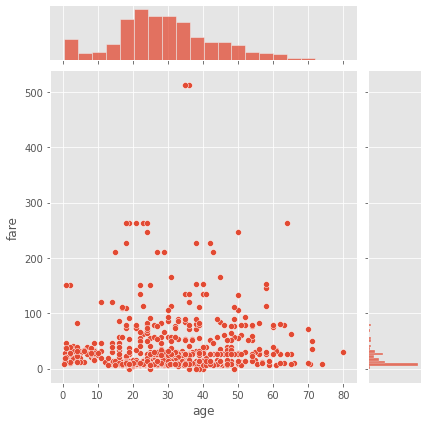

In [63]:
sns.jointplot(x='age', y='fare', data=df)

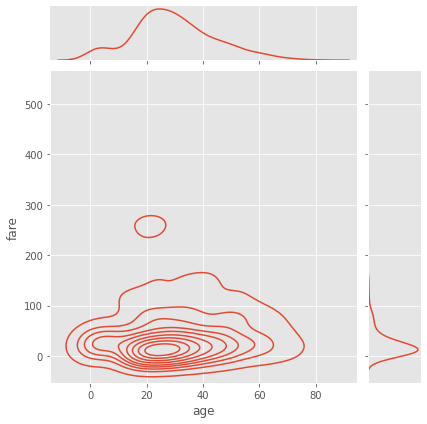

In [64]:
sns.jointplot(x='age', y='fare', data=df, kind='kde')